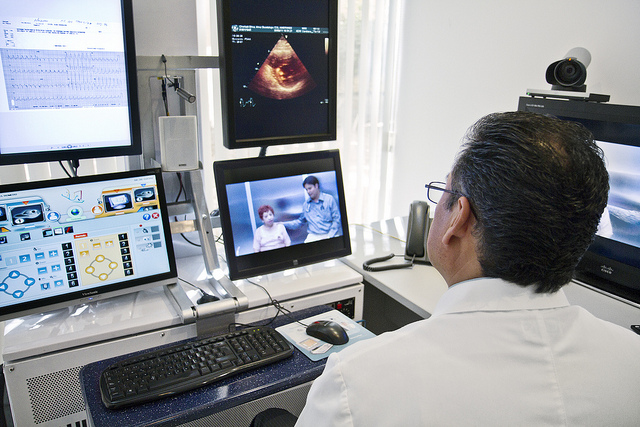


## Background challenge

Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is provided courtesy of the [Cleveland Heart Disease Database](http://archive.ics.uci.edu/ml/datasets/statlog+(heart) via the UCI Machine Learning repository.

Aha, D., and Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." University of California 3.1 (1988): 3-2.

Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease.

## Solution steps

* Load data
* Data analysis
* Some data preprocessing
* Choosing the right ML algorithm
* Prediction

Let's begin! We will solve this challenge using Python code.

In [51]:
import pandas as pd

#Importing data
data_x = pd.read_csv("C:/Users/ruben/OneDrive/Escritorio/PYTHON/MACHINE LEARNING/PROJECTS/Machine Learning with a Heart/train_values.csv") #training values

data_y = pd.read_csv("C:/Users/ruben/OneDrive/Escritorio/PYTHON/MACHINE LEARNING/PROJECTS/Machine Learning with a Heart/train_labels.csv") #training labels

data_test = pd.read_csv("C:/Users/ruben/OneDrive/Escritorio/PYTHON/MACHINE LEARNING/PROJECTS/Machine Learning with a Heart/test_values.csv") #test values


In [52]:
#Data analysis

data_x.shape

(180, 14)

We have 180 patients and 14 features.

In [53]:
data_x.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


Okay. Here we see some useful information. 

Our first feature is *patient_id*. This feature doesn't provide information to construct our prediction model, so we can substract it. 

*thal* is a string type variable. We should convert it to number.

In [54]:
data_x.describe(include=[object])

,patient_id,thal
count,180,180
unique,180,3
top,k7ef7h,normal
freq,1,98


*thal* includes only 3 different features, so we can easily convert it to -1, 0 and 1.

In [55]:
# Data pre-processing

#We need to restructure data and convert "thal" variable to number
X = data_x.values #convert dataframe to numpy array
X = X[:,1:] #We don't need "patient id", so we extract it

y = data_y.values
y = y[:,1]

test = data_test.values
test = test[:,1:]



#Converting "thal" variable to number
X[X == "normal"] = 0 #substituting normal by 0
X[X == "reversible_defect"] = 1 #reversible_defect by 1
X[X == "fixed_defect"] = -1 #fixed_defect by -1

test[test == "normal"] = 0 #substituting normal by 0
test[test == "reversible_defect"] = 1 #reversible_defect by 1
test[test == "fixed_defect"] = -1 #fixed_defect by -1


#sklearn doesn't recognize the class type "object", so we need to convert it to int or float(depending if we have decimal values)
X=X.astype('float') 
y=y.astype('int') 
test=test.astype('float')

Now we have the data ready. It is time to decide what algorithm we want to use to make predictions.

We have labeled data, we want to predict a category (disease or not) and we have less than 100k samples: let's try SVM classification.

We will use cross-validation to check the accuracy, if accuracy is not high enough we will try other algorithms.

In [56]:
#SVM (linear)

#Creating the model
from sklearn import svm
clf = svm.SVC(kernel = "linear", C=1)

#Computing cross-validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv = 5) #5 times

#Let's print the mean score and the 95% confidence interval
print("Accuracy linear SVM: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))

Accuracy linear SVM: 0.79 (+/- 0.16)


0.79 accuracy. It's not bad but I think we could obtain better perfomance with some other algorithm. Let's try a few more!

In [57]:
#SVM with kernel
clf = svm.SVC(kernel = "rbf", C=1, gamma = "auto")

#cross-validation scores
scores = cross_val_score(clf, X, y, cv = 5) #5 times

#Printing mean score and 95% ci
print("Accuracy SVM with rbf kernel: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))


Accuracy SVM with rbf kernel: 0.55 (+/- 0.02)


0.55. No, thank you.

In [58]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

#number of neighbors
n_neighbors=15

#classifier
clf = KNeighborsClassifier(n_neighbors)


#cross validation scores
scores = cross_val_score(clf, X, y, cv=5)

#Printing mean score and 95% ci
print("Accuracy kNN classifier: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))

Accuracy kNN classifier: 0.63 (+/- 0.15)


kNN gives us 0.63. I tried some other number of neighbours and it's not better. Let's try one last algorithm.

In [59]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#classifier
clf = GaussianNB() #Gaussian Naive Bayes

#cross validation scores
scores = cross_val_score(clf, X, y, cv=5)

#Printing mean score and 95% ci
print("Accuracy Gaussian Naive Bayes: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))


Accuracy Gaussian Naive Bayes: 0.82 (+/- 0.10)


Okay, NB gives us the best performance. We will use this algorithm to make the predictions.

In [60]:
#Let's make our predictions

clf = GaussianNB() #Gaussian Naive Bayes

clf.fit(X,y)

predictions = clf.predict_proba(test) #predicting the probability

print(predictions)

[[9.41852313e-01 5.81476866e-02]
 [9.99559278e-01 4.40721955e-04]
 [5.41562512e-04 9.99458437e-01]
 [9.98758791e-01 1.24120909e-03]
 [4.96825351e-05 9.99950317e-01]
 [9.99207046e-01 7.92954453e-04]
 [8.42052011e-01 1.57947989e-01]
 [1.35996029e-04 9.99864004e-01]
 [9.60033776e-01 3.99662241e-02]
 [9.81662162e-01 1.83378384e-02]
 [6.54908581e-02 9.34509142e-01]
 [5.50935453e-01 4.49064547e-01]
 [5.01251981e-01 4.98748019e-01]
 [1.23224961e-05 9.99987678e-01]
 [9.15946702e-01 8.40532984e-02]
 [9.99929094e-01 7.09055296e-05]
 [9.99919203e-01 8.07971561e-05]
 [9.87581619e-01 1.24183809e-02]
 [4.35478756e-04 9.99564521e-01]
 [9.94323058e-01 5.67694238e-03]
 [1.07324771e-05 9.99989268e-01]
 [9.78713845e-01 2.12861547e-02]
 [9.92959194e-01 7.04080615e-03]
 [9.99952981e-01 4.70190940e-05]
 [9.06852351e-01 9.31476494e-02]
 [1.09577829e-03 9.98904222e-01]
 [6.08007202e-01 3.91992798e-01]
 [9.71561523e-01 2.84384765e-02]
 [6.24222050e-02 9.37577795e-01]
 [9.99429605e-01 5.70394859e-04]
 [3.707737

Here, we obtained the probability of not having heart disease (column 1) and probability of having heart disease (column 2).

As a final step, we will prepare the results to meet the submission requirements.


In [61]:
import numpy as np

results = predictions[:,1] #we only need the second column
results = np.round(results, 3) #round to get 3 decimals
id_results = data_test.values[:,0] # we need patient_id


In [62]:
submitted_results = np.column_stack((id_results, results))
submitted_results

array([['olalu7', 0.058],
       ['z9n6mx', 0.0],
       ['5k4413', 0.999],
       ['mrg7q5', 0.001],
       ['uki4do', 1.0],
       ['kev1sk', 0.001],
       ['9n6let', 0.158],
       ['jxmtyg', 1.0],
       ['51s2ff', 0.04],
       ['wi9mcs', 0.018],
       ['741h4l', 0.935],
       ['1ef64a', 0.449],
       ['wa2ix6', 0.499],
       ['8167zl', 1.0],
       ['n6nldr', 0.084],
       ['ph85fp', 0.0],
       ['jfan5p', 0.0],
       ['7c4iz1', 0.012],
       ['ukigml', 1.0],
       ['flwvnq', 0.006],
       ['5i4fw2', 1.0],
       ['du1pqf', 0.021],
       ['vs68qz', 0.007],
       ['pfyez0', 0.0],
       ['azvkw2', 0.093],
       ['cird1i', 0.999],
       ['3bg32t', 0.392],
       ['xzd050', 0.028],
       ['eyi8et', 0.938],
       ['ce4x2h', 0.001],
       ['sm91nr', 0.996],
       ['2il8hh', 0.026],
       ['yq9cqg', 0.534],
       ['520v5j', 0.957],
       ['ammgu2', 0.004],
       ['jix8hj', 0.001],
       ['lj5zrq', 0.379],
       ['16ceba', 0.707],
       ['93w44s', 0.012],
     

Finally we have to create the .csv file.

In [63]:
#creating the csv file with pandas
df = pd.DataFrame(submitted_results)
df.to_csv("C:/Users/ruben/OneDrive/Escritorio/PYTHON/MACHINE LEARNING/PROJECTS/Machine Learning with a Heart/results_heart_disease.csv", index = None, header = ['patient_id', 'heart_disease_present'])

And we are done!